Let's see if an aircraft can be captured by two ADS-B in opensky

In [1]:
from pyopensky import OpenskyImpalaWrapper
from datetime import datetime, timedelta
import pandas as pd

import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

## Get data from London

In [2]:
## Set the time


opensky = OpenskyImpalaWrapper()

time_col = "time"

serial = -1408236292

time_mid = '2022-01-01T00:00' #'%Y-%m-%dT%H:%M'
time_mid = datetime.strptime(time_mid, '%Y-%m-%dT%H:%M')
duration = 12 #hour
duration *= 60

series_opensky = pd.date_range(start=(time_mid).strftime('%Y-%m-%d %H:%M:%S'),
                                end=(time_mid + timedelta(minutes=duration)).strftime('%Y-%m-%d %H:%M:%S'), freq="10min").strftime('%Y-%m-%d %H:%M:%S')

series_opensky = series_opensky[-2:]
print(series_opensky)

ts_start = pd.Timestamp(series_opensky[-2], tz="utc").timestamp()
ts_end = pd.Timestamp(series_opensky[-1], tz="utc").timestamp()
hour_start = ts_start // 3600 * 3600
hour_end = (ts_end // 3600 + 1) * 3600

query = "SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE " 
# query += "lat<={} AND lat>={} AND lon<={} AND lon>={} ".format(lat1, lat2, lon1, lon2)
query += "hour>={} ".format(hour_start)
query += "AND hour<={} ".format(hour_end)
query += "AND {}>={} ".format(time_col, ts_start)
query += "AND {}<={} ".format(time_col, ts_end)
query += "AND s.ITEM = {}".format(serial)

df_london = opensky.rawquery(query)

if(df_london is not None):
    df_london.dropna(subset=["callsign"], inplace=True)
    df_london = df_london[df_london["onground"] == False]

    df_grouped_london = df_london.groupby('icao24', group_keys=True).apply(lambda x: x)
    df_grouped_london['updateinterval'] = df_grouped_london['lastposupdate'].diff()

    df_grouped_london = df_grouped_london[(df_grouped_london['updateinterval'] > 0) & (df_grouped_london['updateinterval'] < 50)]

    ungrouped_df_london = df_grouped_london.reset_index(drop=True)
    
df_london

icao_london = ungrouped_df_london['icao24'].unique()
print(icao_london)

* Server connection successful!
Index(['2022-01-01 11:50:00', '2022-01-01 12:00:00'], dtype='object')
* Fetching records...
Sending query request: [SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE hour>=1641034800.0 AND hour<=1641042000.0 AND time>=1641037800.0 AND time<=1641038400.0 AND s.ITEM = -1408236292]
Processing query result.
* Records downloaded.
['06a0fc' '06a14b' '344297' '3965a1' '3991e9' '3c1baf' '3c4aa9' '3c4aad'
 '3c65d6' '3c65d9' '40095d' '40097c' '400eff' '400fdb' '40125e' '4018ad'
 '405d11' '40621b' '406319' '40643c' '40643d' '406444' '407131' '40749b'
 '407537' '4075a2' '4075fe' '407689' '4076cc' '4076e2' '40772d' '40773a'
 '407797' '407930' '4401f7' '448ced' '45aa90' '479301' '47a3b0' '48c12c'
 '48c138' '48c235' '49328a' '4b1a39' '4ba955' '4bb272' '4bb842' '4ca15d'
 '4ca2c3' '4ca4ee' '4ca80f' '4ca8d5' '4ca97a' '4ca9c2' '4ca9d0' '4caa57'
 '4cafd1' '4d2246' '4d22c1' '502d45' '789213' '896303' '8964fe' '896537'
 '89653d' '89655c']


## Get Data Delft

In [4]:
## Set the time


opensky = OpenskyImpalaWrapper()

time_col = "time"

serial = -1408237098

time_mid = '2022-01-01T00:00' #'%Y-%m-%dT%H:%M'
time_mid = datetime.strptime(time_mid, '%Y-%m-%dT%H:%M')
duration = 12 #hour
duration *= 60

series_opensky = pd.date_range(start=(time_mid).strftime('%Y-%m-%d %H:%M:%S'),
                                end=(time_mid + timedelta(minutes=duration)).strftime('%Y-%m-%d %H:%M:%S'), freq="10min").strftime('%Y-%m-%d %H:%M:%S')

series_opensky = series_opensky[-2:]
print(series_opensky)

ts_start = pd.Timestamp(series_opensky[-2], tz="utc").timestamp()
ts_end = pd.Timestamp(series_opensky[-1], tz="utc").timestamp()
hour_start = ts_start // 3600 * 3600
hour_end = (ts_end // 3600 + 1) * 3600

query = "SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE " 
# query += "lat<={} AND lat>={} AND lon<={} AND lon>={} ".format(lat1, lat2, lon1, lon2)
query += "hour>={} ".format(hour_start)
query += "AND hour<={} ".format(hour_end)
query += "AND {}>={} ".format(time_col, ts_start)
query += "AND {}<={} ".format(time_col, ts_end)
query += "AND s.ITEM = {}".format(serial)

df_delft = opensky.rawquery(query)

if(df_delft is not None):
    df_delft.dropna(subset=["callsign"], inplace=True)
    df_delft = df_delft[df_delft["onground"] == False]

    df_grouped_delft = df_delft.groupby('icao24', group_keys=True).apply(lambda x: x)
    df_grouped_delft['updateinterval'] = df_grouped_delft['lastposupdate'].diff()

    df_grouped_delft = df_grouped_delft[(df_grouped_delft['updateinterval'] > 0) & (df_grouped_delft['updateinterval'] < 50)]

    ungrouped_df_delft = df_grouped_delft.reset_index(drop=True)
    
df_delft

icao_delft = ungrouped_df_delft['icao24'].unique()
print(icao_delft)

* Server connection successful!
Index(['2022-01-01 11:50:00', '2022-01-01 12:00:00'], dtype='object')
* Fetching records...
Sending query request: [SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE hour>=1641034800.0 AND hour<=1641042000.0 AND time>=1641037800.0 AND time<=1641038400.0 AND s.ITEM = -1408237098]
Processing query result.
* Records downloaded.
['06a0ba' '06a0fc' '06a136' '06a14b' '06a1bd' '34150e' '342188' '343650'
 '344297' '344449' '344455' '346184' '3944ea' '3944eb' '3944f3' '3944f8'
 '3965a1' '39856b' '3986e2' '3991e9' '399224' '399893' '39b169' '39b16a'
 '39c8a9' '39cea7' '39cea9' '3c0ca2' '3c1baf' '3c458f' '3c4891' '3c4895'
 '3c49b1' '3c4aa5' '3c4aa9' '3c4aad' '3c4dc2' '3c4dce' '3c5432' '3c6586'
 '3c658e' '3c65d6' '3c65d8' '3c65d9' '3c65da' '3c6701' '3c670c' '3c674e'
 '3c6753' '3d5d87' '3e1749' '4008e5' '40095d' '40097c' '4009d9' '400fdb'
 '400fe2' '405b6a' '405d11' '406319' '40643c' '40643d' '406444' '406544'
 '406754' '406a3d' '4074e4' '40750e'

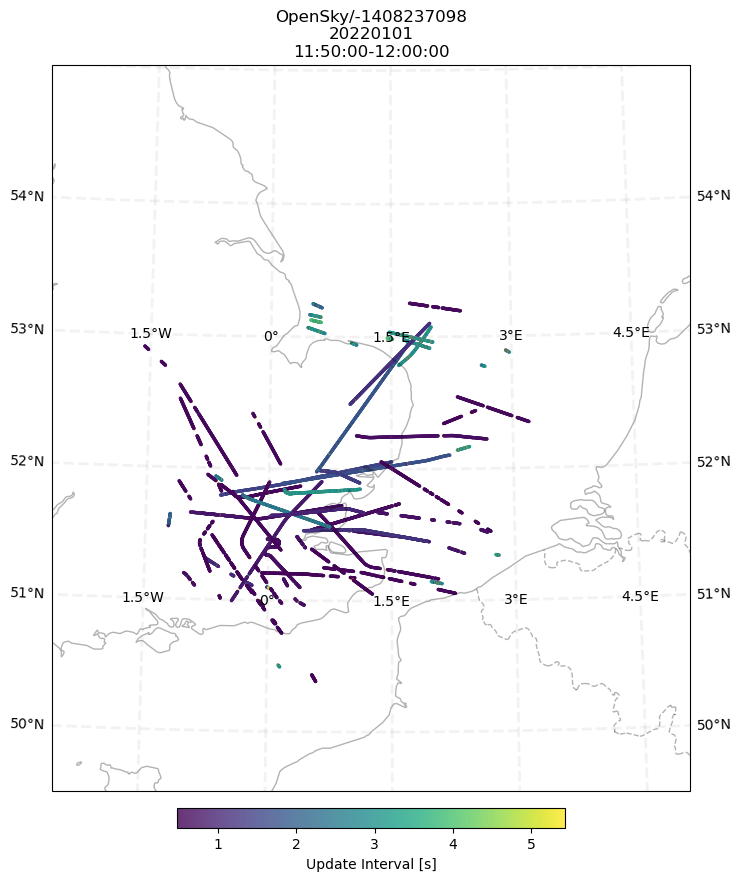

In [7]:
icao = icao_london

projPC = ccrs.PlateCarree()
lonW = -2.5
lonE = 5
latS = 49.5
latN = 55
cLon = (lonW + lonE)/2
cLat = (latS + latN)/2

# Create the figure object
fig = plt.figure(
    figsize=(25, 25)
) 

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection=projLccEur)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
# ax2.set_facecolor(cfeature.COLORS['water'])
# ax2.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, alpha = 0.3)
ax.add_feature(cfeature.BORDERS, linestyle='--', alpha = 0.3)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--'
)

for ic in icao:
    if(ic in icao_delft):
        ac1 = ungrouped_df_london[ungrouped_df_london["icao24"] == ic]
        lon_data = ac1['lon'].tolist()
        lat_data = ac1['lat'].tolist()
        up_data = ac1['updateinterval'].tolist()

        scatter = plt.scatter(lon_data, lat_data, c=up_data, cmap='viridis', s=2, alpha=0.8, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, label='Update Interval [s]', orientation = "horizontal", pad = 0.02, shrink = 0.2)
# fig.tight_layout()
    
ax.set_title('OpenSky/{}\n20220101\n{}-{}'.format(serial, series_opensky[-2][-8:], series_opensky[-1][-8:]));

# plt.show()

In [ ]:
icao = icao_delft

projPC = ccrs.PlateCarree()
lonW = -6
lonE = 9
latS = 45
latN = 55
cLon = (lonW + lonE)/2
cLat = (latS + latN)/2

# Create the figure object
fig = plt.figure(
    figsize=(25, 25)
) 

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection=projLccEur)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
# ax2.set_facecolor(cfeature.COLORS['water'])
# ax2.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, alpha = 0.3)
ax.add_feature(cfeature.BORDERS, linestyle='--', alpha = 0.3)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--'
)

for ic in icao:
    ac1 = ungrouped_df_delft[ungrouped_df_delft["icao24"] == ic]
    lon_data = ac1['lon'].tolist()
    lat_data = ac1['lat'].tolist()
    up_data = ac1['updateinterval'].tolist()
    
    scatter = plt.scatter(lon_data, lat_data, c=up_data, cmap='viridis', s=2, alpha=0.8, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, label='Update Interval [s]', orientation = "horizontal", pad = 0.02, shrink = 0.2)
fig.tight_layout()
    
ax.set_title('OpenSky/{}\n20220101\n{}-{}'.format(serial, series_opensky[-2][-8:], series_opensky[-1][-8:]));


/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/pyproj/transformer.py:820: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.interse

## Two same flights

In [8]:
for ic in icao_london:
    in_delft = ic in icao_delft
    
    print(ic, in_delft)

06a0fc True
06a14b True
344297 True
3965a1 True
3991e9 True
3c1baf True
3c4aa9 True
3c4aad True
3c65d6 True
3c65d9 True
40095d True
40097c True
400eff False
400fdb True
40125e False
4018ad False
405d11 True
40621b False
406319 True
40643c True
40643d True
406444 True
407131 False
40749b False
407537 False
4075a2 True
4075fe True
407689 True
4076cc True
4076e2 False
40772d True
40773a True
407797 True
407930 False
4401f7 True
448ced True
45aa90 True
479301 False
47a3b0 True
48c12c True
48c138 True
48c235 True
49328a True
4b1a39 True
4ba955 True
4bb272 True
4bb842 True
4ca15d True
4ca2c3 True
4ca4ee True
4ca80f True
4ca8d5 False
4ca97a True
4ca9c2 True
4ca9d0 True
4caa57 True
4cafd1 True
4d2246 True
4d22c1 True
502d45 True
789213 True
896303 True
8964fe True
896537 True
89653d True
89655c False


In [9]:
icao_london

array(['06a0fc', '06a14b', '344297', '3965a1', '3991e9', '3c1baf',
       '3c4aa9', '3c4aad', '3c65d6', '3c65d9', '40095d', '40097c',
       '400eff', '400fdb', '40125e', '4018ad', '405d11', '40621b',
       '406319', '40643c', '40643d', '406444', '407131', '40749b',
       '407537', '4075a2', '4075fe', '407689', '4076cc', '4076e2',
       '40772d', '40773a', '407797', '407930', '4401f7', '448ced',
       '45aa90', '479301', '47a3b0', '48c12c', '48c138', '48c235',
       '49328a', '4b1a39', '4ba955', '4bb272', '4bb842', '4ca15d',
       '4ca2c3', '4ca4ee', '4ca80f', '4ca8d5', '4ca97a', '4ca9c2',
       '4ca9d0', '4caa57', '4cafd1', '4d2246', '4d22c1', '502d45',
       '789213', '896303', '8964fe', '896537', '89653d', '89655c'],
      dtype=object)

In [10]:
## Take the first one

icao_id = '06a0fc'
ungrouped_df_london[ungrouped_df_london['icao24'] == icao_id]

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour,item,updateinterval
0,1641037935,06a0fc,51.358803,2.385483,226.007258,289.548549,0.0,QTR66V,False,False,False,3563.0,11582.4,11788.14,1.641038e+09,1.641038e+09,1641034800,-1408236292,0.920
1,1641037936,06a0fc,51.359548,2.382050,226.007258,289.548549,0.0,QTR66V,False,False,False,3563.0,11582.4,11788.14,1.641038e+09,1.641038e+09,1641034800,-1408236292,1.069
2,1641037937,06a0fc,51.360260,2.378911,226.007258,289.548549,0.0,QTR66V,False,False,False,3563.0,11582.4,11788.14,1.641038e+09,1.641038e+09,1641034800,-1408236292,1.094
3,1641037938,06a0fc,51.360947,2.375719,226.007258,289.548549,0.0,QTR66V,False,False,False,3563.0,11582.4,11788.14,1.641038e+09,1.641038e+09,1641034800,-1408236292,0.948
4,1641037939,06a0fc,51.361542,2.373047,226.007258,289.548549,0.0,QTR66V,False,False,False,3563.0,11582.4,11788.14,1.641038e+09,1.641038e+09,1641034800,-1408236292,0.943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,1641038395,06a0fc,51.537506,0.954029,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408236292,0.931
362,1641038396,06a0fc,51.537735,0.950763,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408236292,1.012
363,1641038397,06a0fc,51.537964,0.947942,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408236292,0.894
364,1641038398,06a0fc,51.538284,0.943711,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408236292,1.374


In [11]:
ungrouped_df_delft[ungrouped_df_delft['icao24'] == icao_id]

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hour,item,updateinterval
599,1641037801,06a0fc,51.267328,2.791519,227.012077,289.872176,0.0,QTR66V,False,False,False,3563.0,11582.4,11795.76,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.035
600,1641037802,06a0fc,51.268066,2.788300,226.528334,289.916406,0.0,QTR66V,False,False,False,3563.0,11582.4,11795.76,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.025
601,1641037803,06a0fc,51.268753,2.785108,226.528334,289.916406,0.0,QTR66V,False,False,False,3563.0,11582.4,11795.76,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.014
602,1641037804,06a0fc,51.269119,2.783698,226.528334,289.916406,0.0,QTR66V,False,False,False,3563.0,11582.4,11795.76,1.641038e+09,1.641038e+09,1641034800,-1408237098,0.529
603,1641037805,06a0fc,51.270121,2.779312,226.528334,289.916406,0.0,QTR66V,False,False,False,3563.0,11582.4,11795.76,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,1641038395,06a0fc,51.537506,0.954029,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408237098,0.931
1187,1641038396,06a0fc,51.537735,0.950763,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.012
1188,1641038397,06a0fc,51.537964,0.947942,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408237098,0.894
1189,1641038398,06a0fc,51.538284,0.943711,221.290465,276.943283,0.0,QTR66V,False,False,False,3563.0,11582.4,11765.28,1.641038e+09,1.641038e+09,1641034800,-1408237098,1.374


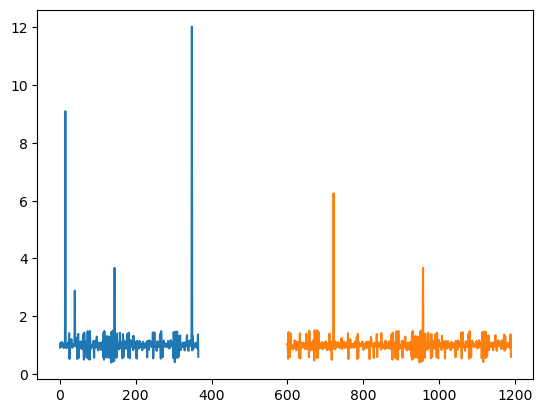

In [12]:
plt.plot(ungrouped_df_london[ungrouped_df_london['icao24'] == icao_id]['updateinterval'])
plt.plot(ungrouped_df_delft[ungrouped_df_delft['icao24'] == icao_id]['updateinterval'])

In [13]:
up_london = ungrouped_df_london[ungrouped_df_london['icao24'] == icao_id]['updateinterval']
up_delft = ungrouped_df_delft[ungrouped_df_delft['icao24'] == icao_id]['updateinterval']

length = 20

print(up_london[-length:], up_delft[-length:])

346     0.981
347     0.992
348    12.030
349     0.819
350     1.316
351     0.926
352     0.874
353     1.037
354     1.057
355     0.956
356     0.956
357     1.013
358     1.080
359     1.020
360     0.923
361     0.931
362     1.012
363     0.894
364     1.374
365     0.599
Name: updateinterval, dtype: float64 1171    0.871
1172    1.368
1173    0.811
1174    0.819
1175    1.316
1176    0.926
1177    0.874
1178    1.037
1179    1.057
1180    0.956
1181    0.956
1182    1.013
1183    1.080
1184    1.020
1185    0.923
1186    0.931
1187    1.012
1188    0.894
1189    1.374
1190    0.599
Name: updateinterval, dtype: float64


## This particular flight

/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/pyproj/transformer.py:820: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return self._transformer._transform_point(
/Users/mfrahman/anaconda3/envs/traffic/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/

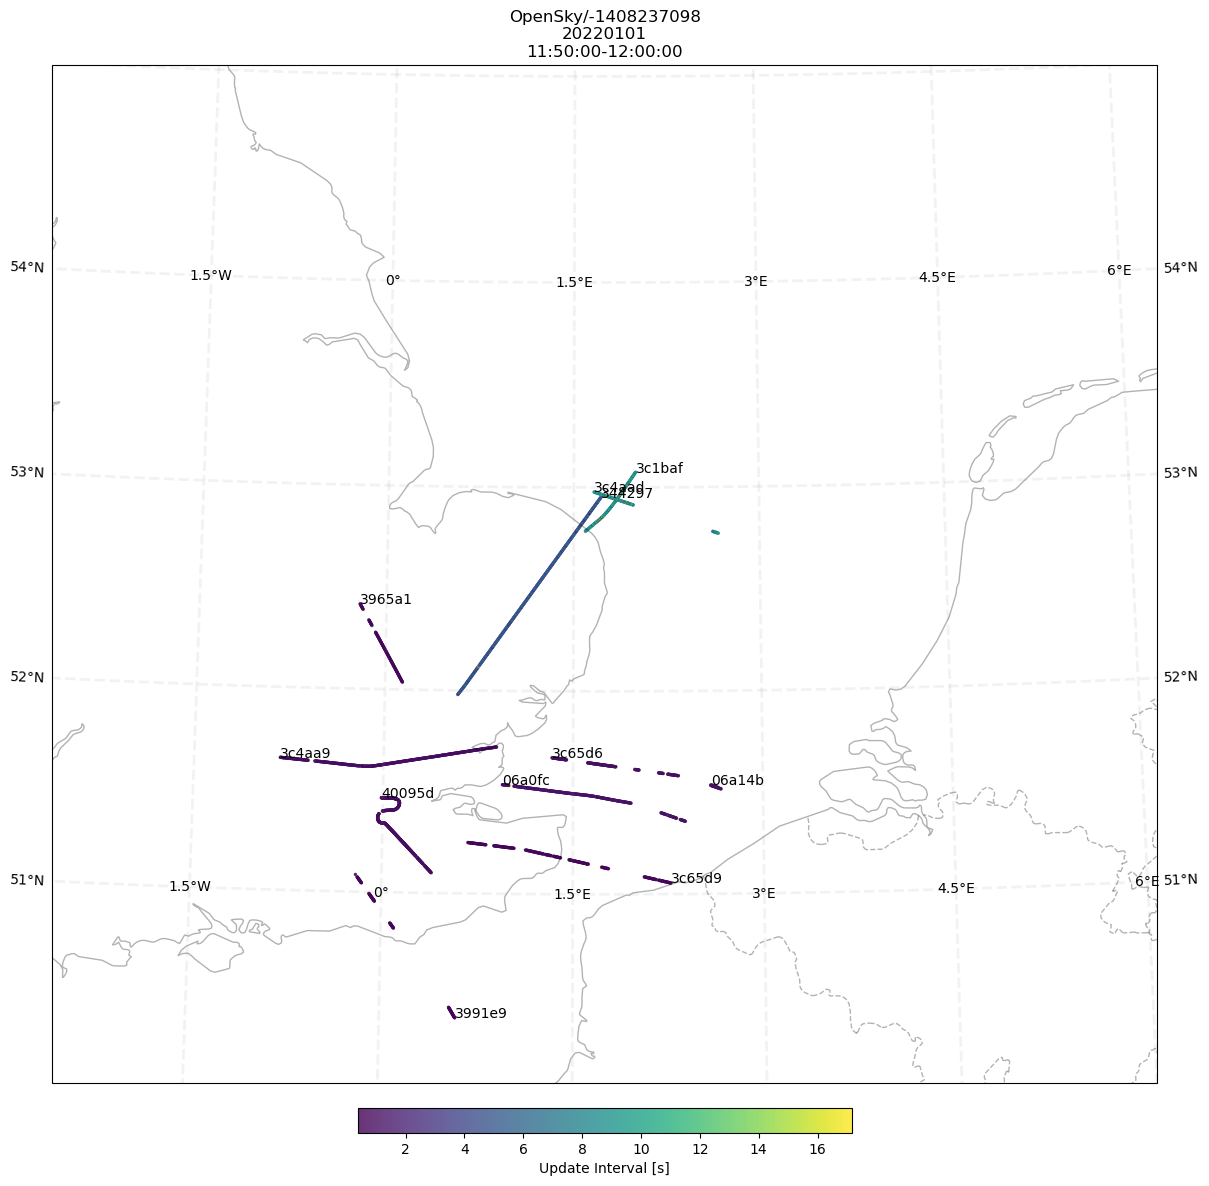

In [14]:
icao = icao_london

projPC = ccrs.PlateCarree()
lonW = -2.5
lonE = 6
latS = 50
latN = 55
cLon = (lonW + lonE)/2
cLat = (latS + latN)/2

# Create the figure object
fig = plt.figure(
    figsize=(25, 25)
) 

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection=projLccEur)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
# ax2.set_facecolor(cfeature.COLORS['water'])
# ax2.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, alpha = 0.3)
ax.add_feature(cfeature.BORDERS, linestyle='--', alpha = 0.3)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--'
)

counter = 0
max_counter = 10

for ic in icao:
    if ((ic in icao_delft) & (counter <= max_counter)):
        counter += 1
        ac1 = ungrouped_df_london[ungrouped_df_london["icao24"] == ic]
        lon_data = ac1['lon'].tolist()
        lat_data = ac1['lat'].tolist()
        up_data = ac1['updateinterval'].tolist()

        scatter = plt.scatter(lon_data, lat_data, c=up_data, cmap='viridis', s=2, alpha=0.8, transform=ccrs.PlateCarree())
        plt.text(lon_data[-1], lat_data[-1], ic, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, label='Update Interval [s]', orientation = "horizontal", pad = 0.02, shrink = 0.2)
fig.tight_layout()
    
ax.set_title('OpenSky/{}\n20220101\n{}-{}'.format(serial, series_opensky[-2][-8:], series_opensky[-1][-8:]));


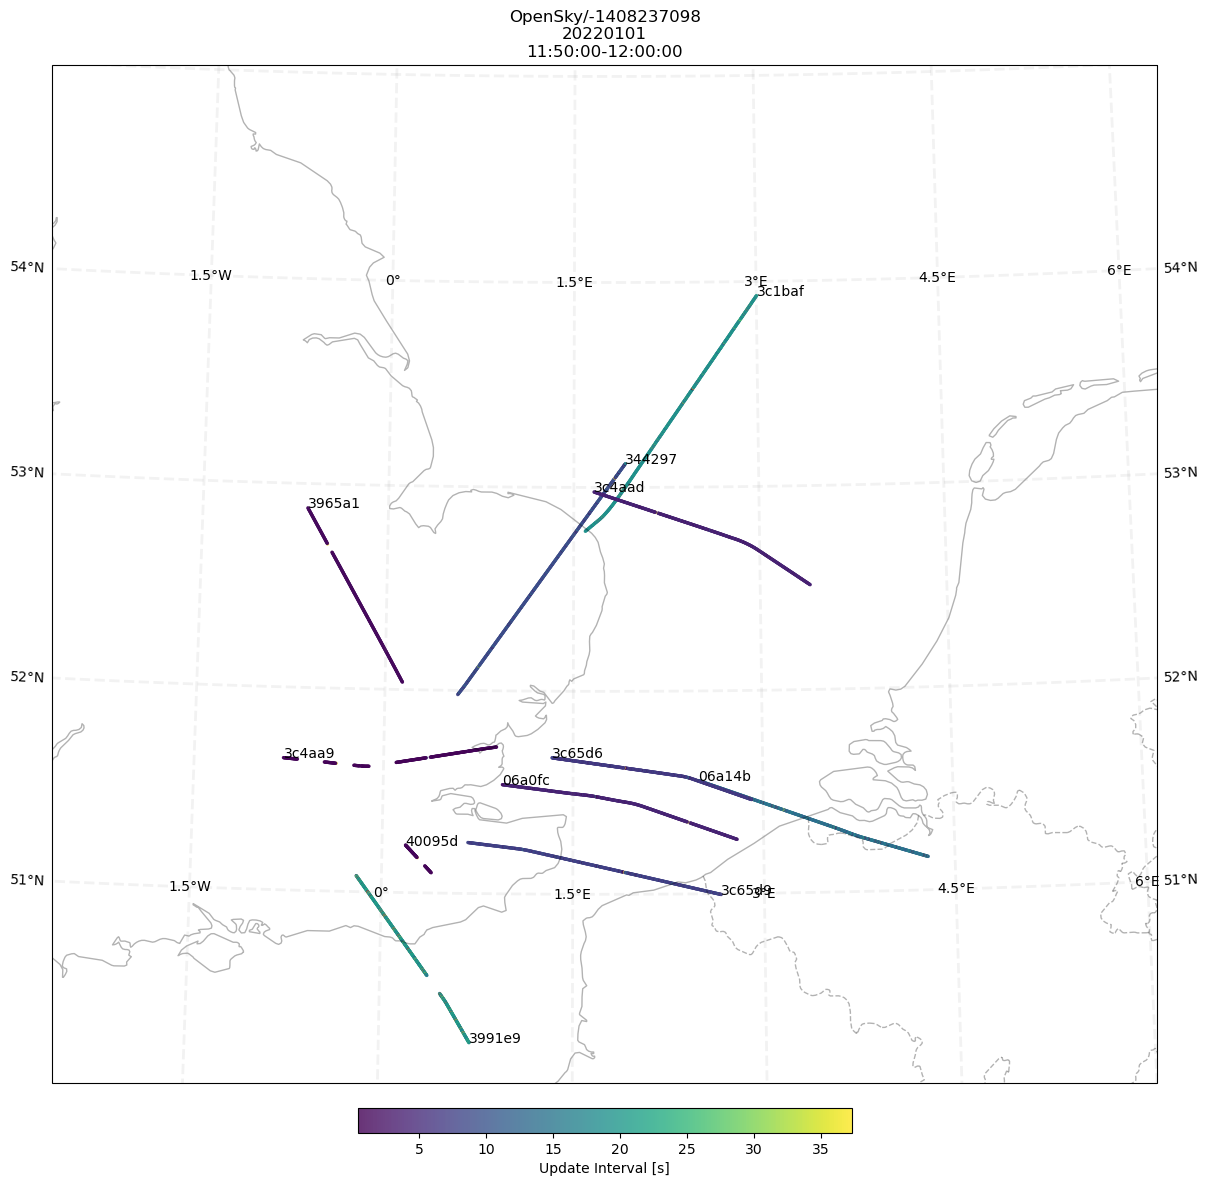

In [15]:
icao = icao_delft

projPC = ccrs.PlateCarree()
lonW = -2.5
lonE = 6
latS = 50
latN = 55
cLon = (lonW + lonE)/2
cLat = (latS + latN)/2

# Create the figure object
fig = plt.figure(
    figsize=(25, 25)
) 

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection=projLccEur)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
# ax2.set_facecolor(cfeature.COLORS['water'])
# ax2.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, alpha = 0.3)
ax.add_feature(cfeature.BORDERS, linestyle='--', alpha = 0.3)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--'
)

counter = 0
max_counter = 10

for ic in icao:
    if ((ic in icao_london) & (counter <= max_counter)):
        counter += 1
        ac1 = ungrouped_df_delft[ungrouped_df_delft["icao24"] == ic]
        lon_data = ac1['lon'].tolist()
        lat_data = ac1['lat'].tolist()
        up_data = ac1['updateinterval'].tolist()

        scatter = plt.scatter(lon_data, lat_data, c=up_data, cmap='viridis', s=2, alpha=0.8, transform=ccrs.PlateCarree())
        plt.text(lon_data[-1], lat_data[-1], ic, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, label='Update Interval [s]', orientation = "horizontal", pad = 0.02, shrink = 0.2)
fig.tight_layout()
    
ax.set_title('OpenSky/{}\n20220101\n{}-{}'.format(serial, series_opensky[-2][-8:], series_opensky[-1][-8:]));


## Another ADS-B

In [16]:
## Set the time


opensky = OpenskyImpalaWrapper()

time_col = "time"

serial = -1408234000

time_mid = '2022-01-01T00:00' #'%Y-%m-%dT%H:%M'
time_mid = datetime.strptime(time_mid, '%Y-%m-%dT%H:%M')
duration = 12 #hour
duration *= 60

series_opensky = pd.date_range(start=(time_mid).strftime('%Y-%m-%d %H:%M:%S'),
                                end=(time_mid + timedelta(minutes=duration)).strftime('%Y-%m-%d %H:%M:%S'), freq="10min").strftime('%Y-%m-%d %H:%M:%S')

series_opensky = series_opensky[-2:]
print(series_opensky)

ts_start = pd.Timestamp(series_opensky[-2], tz="utc").timestamp()
ts_end = pd.Timestamp(series_opensky[-1], tz="utc").timestamp()
hour_start = ts_start // 3600 * 3600
hour_end = (ts_end // 3600 + 1) * 3600

query = "SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE " 
# query += "lat<={} AND lat>={} AND lon<={} AND lon>={} ".format(lat1, lat2, lon1, lon2)
query += "hour>={} ".format(hour_start)
query += "AND hour<={} ".format(hour_end)
query += "AND {}>={} ".format(time_col, ts_start)
query += "AND {}<={} ".format(time_col, ts_end)
query += "AND s.ITEM = {}".format(serial)

df_london_2 = opensky.rawquery(query)

if(df_london_2 is not None):
    df_london_2.dropna(subset=["callsign"], inplace=True)
    df_london_2 = df_london_2[df_london_2["onground"] == False]

    df_grouped_london_2 = df_london_2.groupby('icao24', group_keys=True).apply(lambda x: x)
    df_grouped_london_2['updateinterval'] = df_grouped_london_2['lastposupdate'].diff()

    df_grouped_london_2 = df_grouped_london_2[(df_grouped_london_2['updateinterval'] > 0) & (df_grouped_london_2['updateinterval'] < 50)]

    ungrouped_df_london_2 = df_grouped_london_2.reset_index(drop=True)
    
df_london_2

icao_london_2 = ungrouped_df_london_2['icao24'].unique()
print(icao_london_2)


* Server connection successful!
Index(['2022-01-01 11:50:00', '2022-01-01 12:00:00'], dtype='object')
* Fetching records...
Sending query request: [SELECT * FROM state_vectors_data4, state_vectors_data4.serials s WHERE hour>=1641034800.0 AND hour<=1641042000.0 AND time>=1641037800.0 AND time<=1641038400.0 AND s.ITEM = -1408234000]
Processing query result.
* Records downloaded.
['06a0ba' '06a0fc' '3423c3' '344297' '394a15' '3965a1' '3991e9' '3c1baf'
 '3c4aa9' '3c65d6' '3c65d9' '40095d' '40097c' '4009f9' '400eff' '400fdb'
 '401a63' '401c86' '404a44' '405b6a' '405d11' '40621b' '406319' '40643c'
 '406444' '406674' '406b0a' '406f72' '406fda' '407131' '40749b' '407537'
 '4075fe' '407689' '4076cc' '4076e2' '407734' '40773a' '407794' '407797'
 '407930' '440060' '4401f7' '448ced' '45aa90' '479301' '47a3b0' '484160'
 '484161' '48548d' '48c12c' '48c138' '48c235' '49328a' '4b1a39' '4b1a3d'
 '4ba955' '4ba9d3' '4ba9e4' '4bb856' '4ca15d' '4ca27f' '4ca2a7' '4ca2ad'
 '4ca2c3' '4ca4ee' '4ca80f' '4ca8d5'

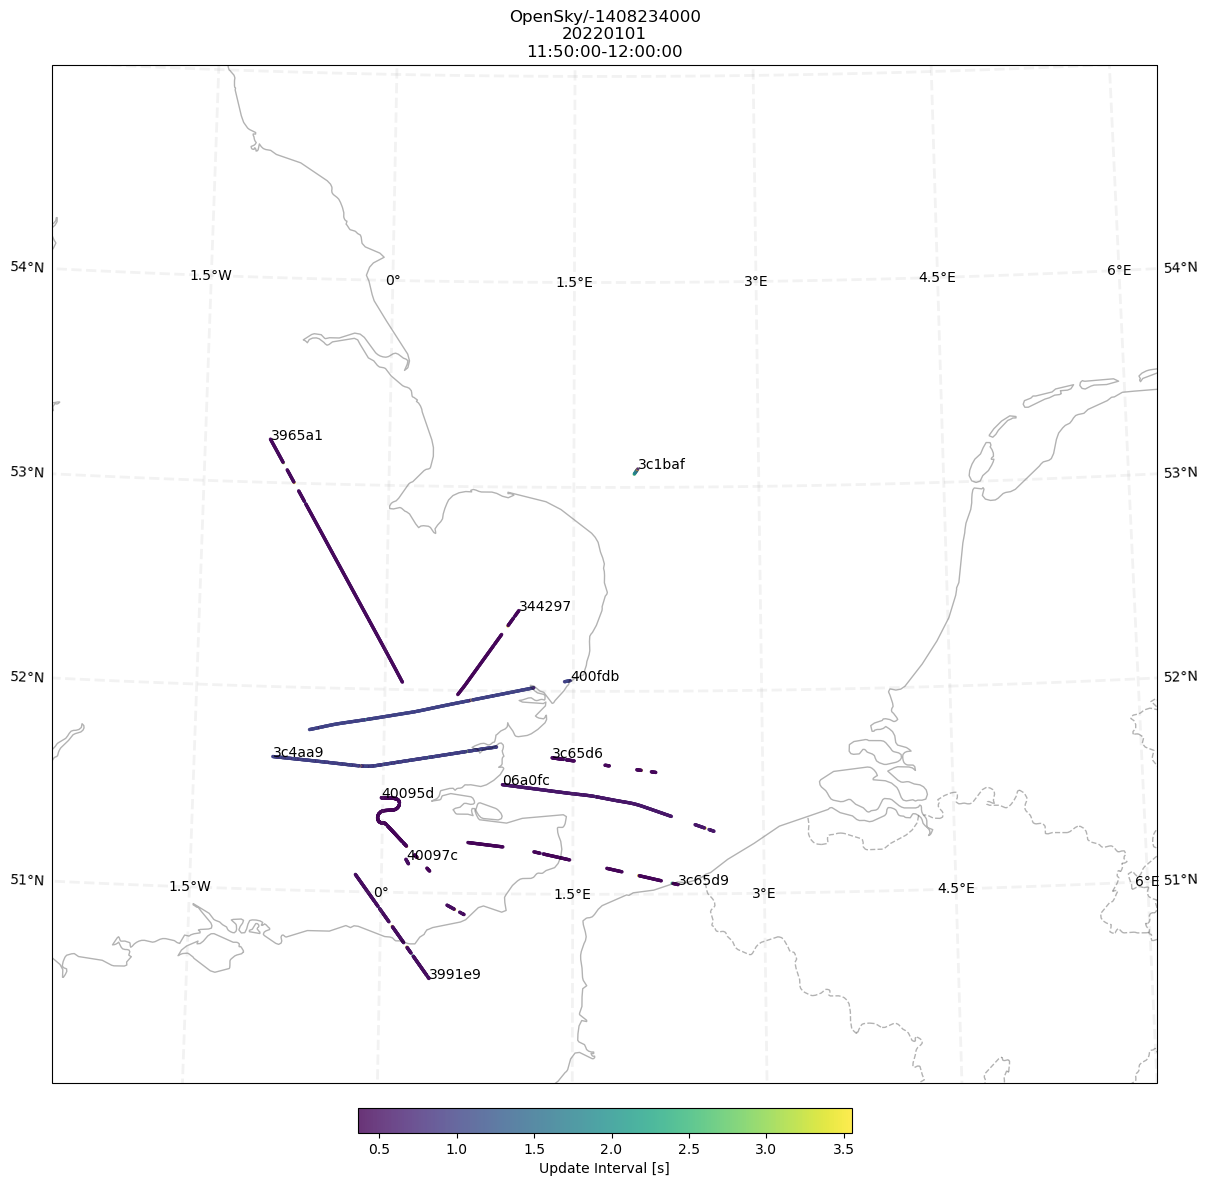

In [18]:
icao = icao_london_2

projPC = ccrs.PlateCarree()
lonW = -2.5
lonE = 6
latS = 50
latN = 55
cLon = (lonW + lonE)/2
cLat = (latS + latN)/2

# Create the figure object
fig = plt.figure(
    figsize=(25, 25)
) 

projLccEur = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)

# Second subplot
ax = fig.add_subplot(2, 1, 2, projection=projLccEur)
ax.set_extent([lonW, lonE, latS, latN], crs=projPC)
# ax2.set_facecolor(cfeature.COLORS['water'])
# ax2.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE, alpha = 0.3)
ax.add_feature(cfeature.BORDERS, linestyle='--', alpha = 0.3)

gl = ax.gridlines(
    draw_labels=True, linewidth=2, color='gray', alpha=0.1, linestyle='--'
)

counter = 0
max_counter = 10

for ic in icao:
    if ((ic in icao_delft) & (ic in icao_london) & (counter <= max_counter)):
        counter += 1
        ac1 = ungrouped_df_london_2[ungrouped_df_london_2["icao24"] == ic]
        lon_data = ac1['lon'].tolist()
        lat_data = ac1['lat'].tolist()
        up_data = ac1['updateinterval'].tolist()

        scatter = plt.scatter(lon_data, lat_data, c=up_data, cmap='viridis', s=2, alpha=0.8, transform=ccrs.PlateCarree())
        plt.text(lon_data[-1], lat_data[-1], ic, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, label='Update Interval [s]', orientation = "horizontal", pad = 0.02, shrink = 0.2)
fig.tight_layout()
    
ax.set_title('OpenSky/{}\n20220101\n{}-{}'.format(serial, series_opensky[-2][-8:], series_opensky[-1][-8:]));


## Check Particular ICAO24

In [19]:
def categorize_update_interval(all_update_interval):
    result_dict = {}

    for num in all_update_interval:
        rounded_value = round(num, 1)
        if rounded_value not in result_dict:
            result_dict[rounded_value] = 0
        result_dict[rounded_value] += 1

    result_dict = dict(sorted(result_dict.items()))

    return result_dict

In [28]:
updateinterval_london

[1.1579999923706055,
 8.236999988555908,
 1.0149998664855957,
 0.942000150680542,
 1.0239999294281006,
 0.6419999599456787,
 1.3670001029968262,
 1.0,
 0.5390000343322754,
 1.1710000038146973,
 1.120999813079834,
 0.9700000286102295,
 0.8630001544952393,
 1.0739998817443848,
 1.0239999294281006,
 0.9550001621246338,
 0.9270000457763672,
 1.4119999408721924,
 0.6019999980926514,
 1.055999994277954,
 1.1129999160766602,
 0.9579999446868896,
 1.0490000247955322,
 1.0069999694824219,
 35.83400011062622,
 0.9930000305175781,
 0.9019999504089355,
 1.5,
 1.0190000534057617,
 0.8949999809265137,
 1.002000093460083,
 0.9670000076293945,
 0.8659999370574951,
 0.9700000286102295,
 0.8429999351501465,
 1.4560000896453857,
 0.40599989891052246,
 1.121000051498413,
 1.0720000267028809,
 0.9789998531341553,
 1.1579999923706055,
 1.008000135421753,
 0.9960000514984131,
 0.9259998798370361,
 1.059999942779541,
 0.9149999618530273,
 1.1030001640319824,
 1.069000005722046,
 1.00600004196167,
 0.936999797

In [20]:
updateinterval_delft = ungrouped_df_delft[ungrouped_df_delft['icao24'] == '3991e9']['updateinterval'].to_list()
updateinterval_london = ungrouped_df_london[ungrouped_df_london['icao24'] == '3991e9']['updateinterval'].to_list()
updateinterval_london_2 = ungrouped_df_london_2[ungrouped_df_london_2['icao24'] == '3991e9']['updateinterval'].to_list()

In [21]:
ungrouped_df_london_2[ungrouped_df_london_2['icao24'] == '3991e9']['updateinterval'].max()

17.005000114440918

In [24]:
up_dict_delft = categorize_update_interval(updateinterval_delft)
up_dict_london = categorize_update_interval(updateinterval_london)
up_dict_london_2 = categorize_update_interval(updateinterval_london_2)

up_dict = [up_dict_delft, up_dict_london]

Text(0, 0.5, '# Occurrence [-]')

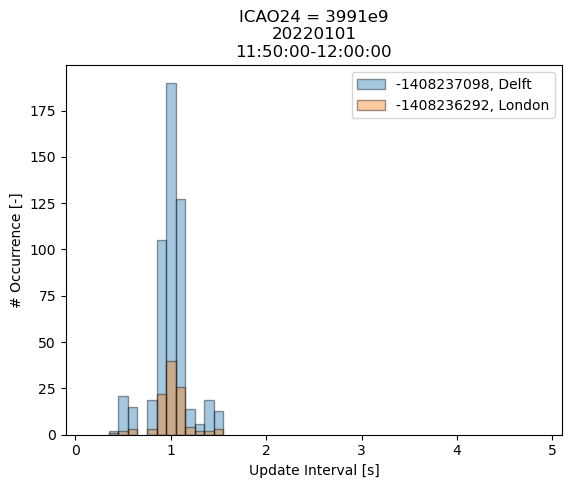

In [25]:
import numpy as np

for my_dict in up_dict:
    x_values = list(my_dict.keys())
    y_values = np.array(list(my_dict.values()))
#     sum_y = sum(y_values)
#     y_values = y_values/sum_y

    plt.bar(x_values, y_values, width = 0.1, edgecolor = 'k', alpha = 0.4)
    plt.xlim([-0.1, 5.1])
    
plt.legend(['-1408237098, Delft', '-1408236292, London', '-1408234000, London'])
plt.title("ICAO24 = 3991e9\n20220101\n{}-{}".format(series_opensky[-2][-8:], series_opensky[-1][-8:]))
plt.xlabel("Update Interval [s]")
plt.ylabel("# Occurrence [-]")

Text(0, 0.5, 'Frequency [%]')

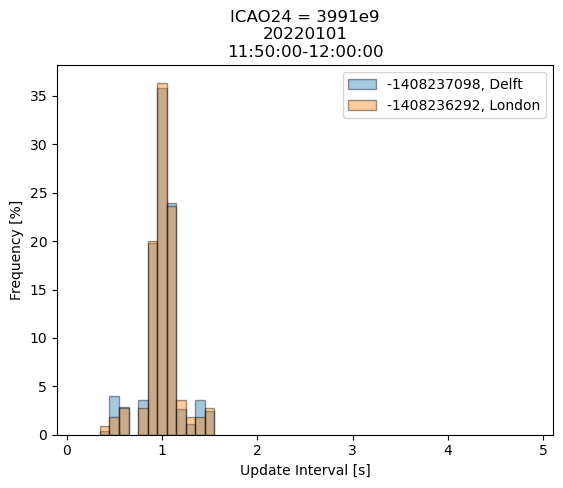

In [31]:
import numpy as np

for my_dict in up_dict:
    x_values = list(my_dict.keys())
    y_values = np.array(list(my_dict.values()))
    sum_y = sum(y_values)
    y_values = y_values/sum_y*100

    plt.bar(x_values, y_values, width = 0.1, edgecolor = 'k', alpha = 0.4)
    plt.xlim([-0.1, 5.1])
    
plt.legend(['-1408237098, Delft', '-1408236292, London', '-1408234000, London'])
plt.title("ICAO24 = 3991e9\n20220101\n{}-{}".format(series_opensky[-2][-8:], series_opensky[-1][-8:]))
plt.xlabel("Update Interval [s]")
plt.ylabel("Frequency [%]")